In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters:
num_of_agents = 10 # number of agents
Timesteps = 10 # timesteps
R = 0.2 # confidence bound


In [3]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]

In [4]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [5]:
# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

array([[0.01153891, 0.03299273, 0.1494315 , 0.25219064, 0.30600249,
        0.45967715, 0.57942985, 0.62741586, 0.80208879, 0.95804798],
       [0.06465438, 0.06465438, 0.15043125, 0.23587488, 0.29182544,
        0.49313134, 0.55550762, 0.61715291, 0.79585087, 0.88006838],
       [0.12890372, 0.12890372, 0.16148807, 0.16148807, 0.22604386,
        0.55526396, 0.55526396, 0.61541069, 0.76435739, 0.83795963],
       [0.16136549, 0.16136549, 0.16136549, 0.16136549, 0.16136549,
        0.57531287, 0.57531287, 0.622574  , 0.73924257, 0.80115851],
       [0.16136549, 0.16136549, 0.16136549, 0.16136549, 0.16136549,
        0.62811057, 0.62811057, 0.66272016, 0.66272016, 0.72099169],
       [0.16136549, 0.16136549, 0.16136549, 0.16136549, 0.16136549,
        0.66053063, 0.66053063, 0.66053063, 0.66053063, 0.66053063],
       [0.16136549, 0.16136549, 0.16136549, 0.16136549, 0.16136549,
        0.66053063, 0.66053063, 0.66053063, 0.66053063, 0.66053063],
       [0.16136549, 0.16136549, 0.1613654

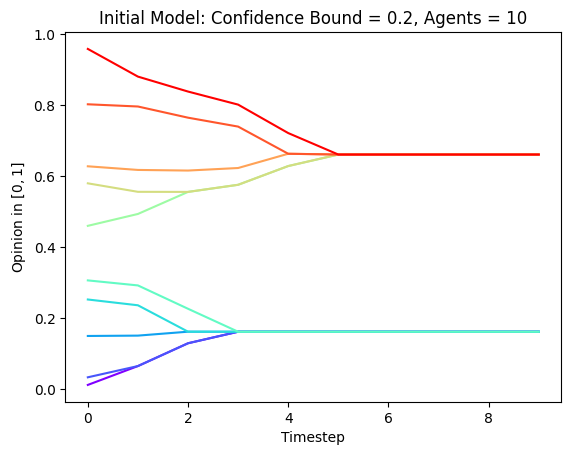

In [ ]:
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.title(f'Initial Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()
